# Missing Values- Feature Engineering


Lifecycle of a Data Science Projects

Data Collection Statergy---from company side,3rd party APi's,Surveys,Surveys

Feature Engineering---Handling Missing Values

Why are their Missing values?? Survey--Depression Survey

They hesitate to put down the information

Survey informations are not that valid

Men--salary

Women---age

People may have died----NAN

Data Science Projects---Dataset should be collected from multiple sources

## Types of missing values



##### 1 Missing Completely at Random, MCAR:
A variable is missing completely at random (MCAR) if the probability of being missing is the same for all the observations.

When data is MCAR, there is absolutely no relationship between the data missing and any other values, observed or missing,

within the dataset. In other words, those missing data points are a random subset of the data.

There is nothing systematic going on that makes some data more likely to be missing than other.

##### Missing Data Not At Random(MNAR): 

Systematic missing Values There is absolutely some relationship between the data missing and any other values,

observed or missing, within the dataset.


### All the techniques of handling ,issing values

1. Mean/ Median/Mode replacement
2. Random Sample Imputation
3. Capturing NAN values with a new feature
4. End of Distribution imputation
5. Arbitrary imputation
6. Frequent categories imputation

In [2]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [3]:
df=pd.read_csv(r'C:\Users\asifk\Downloads\train.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
print(df.isnull().sum())
print(df.shape)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
(891, 12)


### Mean/ Median/Mode replacement

In [7]:


def impute_null(df,feature,mode):
    df[feature+"_mode"]=df[feature].fillna(mode)

In [8]:
print(df['Age'].isnull().sum())

median=df.Age.median()
print(median)

177
28.0


In [9]:
impute_null(df,'Age',median)

In [10]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_mode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,22.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,38.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,26.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,35.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,35.0


In [11]:
df['Age_mode'].isnull().sum()

0

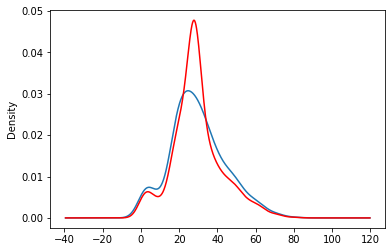

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_mode.plot(kind='kde', ax=ax, color='red') 
lines, labels = ax.get_legend_handles_labels()

## Advantages And Disadvantages of Mean/Median Imputation

#### Advantages
Easy to implement(Robust to outliers)

Faster way to obtain the complete dataset 
#### Disadvantages
Change or Distortion in the original variance

Impacts Correlation

### Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? It assumes that the data are missing completely at random(MCAR)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df1=pd.read_csv(r'C:\Users\asifk\Downloads\train.csv',usecols=['Age','Fare','Survived'])

In [8]:
df1.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [9]:
df1.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [11]:
df1['Age'].dropna().sample(df1['Age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [13]:
df1[df1['Age'].isnull()].index

Int64Index([  5,  17,  19,  26,  28,  29,  31,  32,  36,  42,
            ...
            832, 837, 839, 846, 849, 859, 863, 868, 878, 888],
           dtype='int64', length=177)

In [18]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [15]:
median=df.Age.median()
print(median)

28.0


In [20]:
impute_nan(df1,'Age',median)

In [25]:
df1.head()

,Survived,Age,Fare,Age_random,Age_median
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


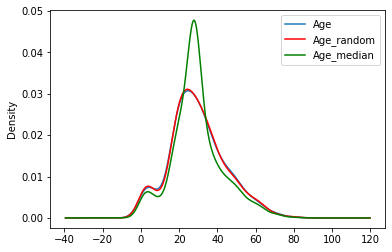

In [28]:
fig=plt.figure()
ax=fig.add_subplot()
df1['Age'].plot(kind='kde',ax=ax)
df1['Age_random'].plot(kind='kde',ax=ax,color='red')
df1['Age_median'].plot(kind='kde',ax=ax,color='green')
lines , lables = ax.get_legend_handles_labels()
ax.legend(lines,lables,loc='best')


#### Advantages

Easy To implement

There is less distortion in variance

#### Disadvantage

Every situation randomness wont work



## Capturing NAN values with a new feature

It works well if the data are not missing completely at random

In [40]:
df=pd.read_csv(r'C:\Users\asifk\Downloads\train.csv',usecols=['Age','Fare','Survived'])

In [41]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [42]:
df['Age_nan']=np.where(df['Age'].isnull(),1,0)

In [43]:
df.head(5)

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [44]:
df['Age'].fillna(df.Age.median(),inplace=True)

In [45]:
df

,Survived,Age,Fare,Age_nan
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,1,19.0,30.0000,0
888,0,28.0,23.4500,1
889,1,26.0,30.0000,0


#### Advantages
Easy to implement

Captures the importance of missing values
#### Disadvantages

Creating Additional Features(Curse of Dimensionality)


## End of Distribution imputation

In [47]:
df=pd.read_csv(r'C:\Users\asifk\Downloads\train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


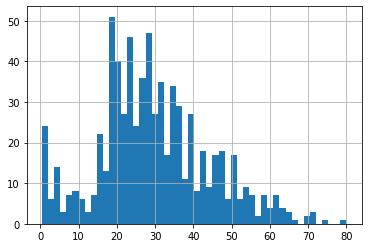

In [50]:
df['Age'].hist(bins=50)

In [54]:
extreme=df.Age.mean()+3*df.Age.std()

In [55]:
extreme

73.27860964406095

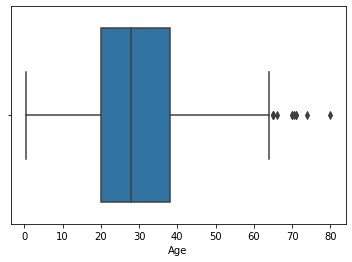

In [56]:
sns.boxplot(df.Age)

In [59]:
def impute_nan(df,feature,median,extreme):
    df[feature+'_end_distribution']=df[feature].fillna(extreme)
    df[feature].fillna(median,inplace=True)
    
    

In [60]:
impute_nan(df,"Age",df.Age.median(),extreme)

In [62]:
df.head(10)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


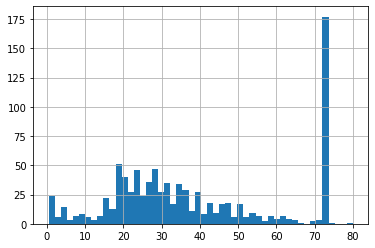

In [66]:
df['Age_end_distribution'].hist(bins=50)

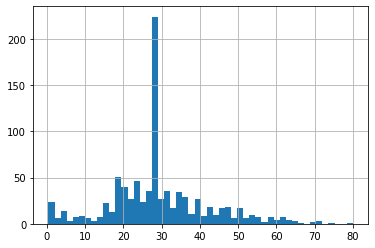

In [67]:
df['Age'].hist(bins=50)

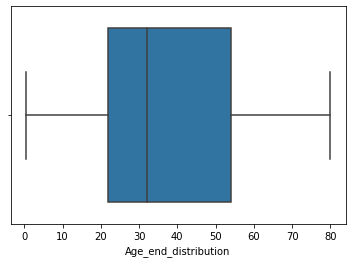

In [68]:
sns.boxplot(df['Age_end_distribution'])

#### Advantages:

· Easy to implement

· Fast way of obtaining complete datasets

· Can be integrated into production (during model deployment)

· Captures the importance of “missingness” if there is one

#### Disadvantages:
    
· Distortion of the original variable distribution

· Distortion of the original variance

· Distortion of the covariance with the remaining variables of the dataset

· This technique may mask true outliers in the distribution


## Arbitrary Value Imputation¶

#### Advantages

Easy to implement

Captures the importance of missingess if there is one

#### Disadvantages
Distorts the original distribution of the variable

If missingess is not important, it may mask the predictive power of the original variable by distorting its distribution

Hard to decide which value to use